# Exploring flight information

In [1]:
## Reading the OnTime flights data
with ib.open('/tsellam/exploredb/fs/Instabase%20Drive/files/ontime-small.csv') as csvfile:
    data = pd.read_csv(csvfile, low_memory=False)
print data

      Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0     2015        1      1           7          3  2015-01-07            EV   
1     2015        1      1          15          4  2015-01-15            DL   
2     2015        1      1          11          7  2015-01-11            EV   
3     2015        1      1          25          7  2015-01-25            DL   
4     2015        1      1           9          5  2015-01-09            EV   
5     2015        1      1          21          3  2015-01-21            UA   
6     2015        1      1          15          4  2015-01-15            UA   
7     2015        1      1           5          1  2015-01-05            WN   
8     2015        1      1           7          3  2015-01-07            AA   
9     2015        1      1          17          6  2015-01-17            WN   
10    2015        1      1           3          6  2015-01-03            WN   
11    2015        1      1          31          6  2

In [4]:
## Getting basic statistics

# Number of rows
print(len(data))

# Number of flights per Destination State
states = data.groupby('DestStateName').size()
print(states)

# Average delay per Destination State
av_delay = (data.groupby('DestStateName')['ArrDelay']
                .mean())
print(av_delay)

# 3 carriers with the worst delays
carrier_delays = (data.groupby('Carrier', as_index = False)
                      .agg({'ArrDelay' : 'mean'})
                      .sort_values(by = 'ArrDelay')
                      .nlargest(3, 'ArrDelay'))
print(carrier_delays)

  Carrier   ArrDelay
7      MQ  18.352542
8      NK  16.265000
5      F9  14.666667


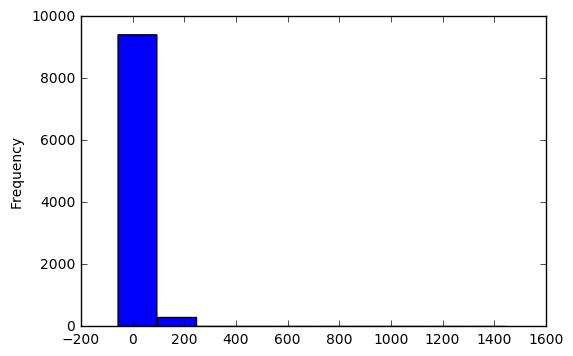

In [9]:
## Next, a few plots:

# Distribution of Delays
data['ArrDelay'].plot.hist()


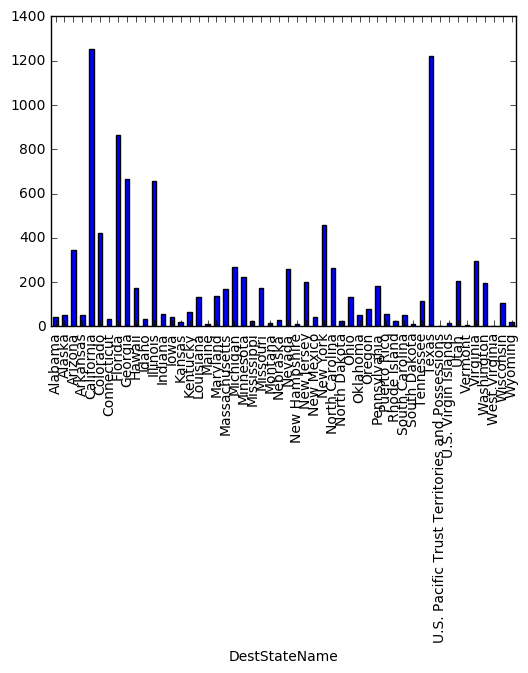

In [10]:
# Number of flights per Destination State
states = data.groupby('DestStateName').size()
states.plot(kind='bar')

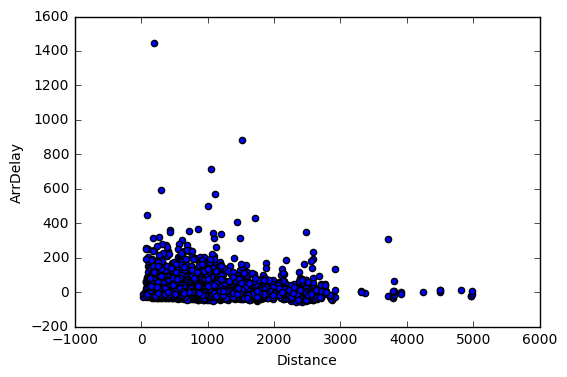

In [13]:
# Scatter Plot of delay vs. flight duration
data.plot.scatter(x='Distance', y='ArrDelay')